In [1]:
import os
import sys
sys.path.append('/home/yang_liu/python_workspace/gaussian-splatting-lightning/notebooks')

import json
import numpy as np
import matplotlib.pyplot as plt

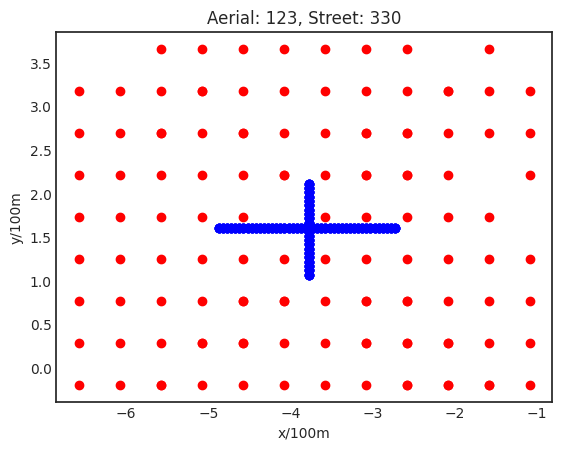

In [22]:
json_path = '../data/matrix_city/aerial_street_fusion/pose'
train_path = os.path.join(json_path, 'transforms_train.json')
test_path = os.path.join(json_path, 'transforms_test.json')
with open(train_path) as json_file:
    contents = json.load(json_file)

frames = contents["frames"]
aerial_frames = []
street_frames = []
plt.figure()
plt.style.use('seaborn-v0_8-white')

for i, frame in enumerate(frames):
    c2w = np.array(frame["transform_matrix"])
    pos = c2w[:3, 3]
    if 'aerial' in frame["file_path"]:
        plt.plot(pos[0], pos[1], 'o', color='r', label='aerial')
        aerial_frames.append(frame)
    else:
        plt.plot(pos[0], pos[1], 'o', color='b', label='street')
        street_frames.append(frame)

plt.xlabel('x/100m')
plt.ylabel('y/100m')
plt.title(f'Aerial: {len(aerial_frames)}, Street: {len(street_frames)}')
plt.show()